In [ ]:
from google.colab import files

# This will prompt you to upload the kaggle.json file
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"himanshuxsh","key":"702d40d46082274bbcc78d399b0bcbee"}'}

In [ ]:
# Create a directory for Kaggle API key
!mkdir -p ~/.kaggle

# Move the kaggle.json file to this directory
!mv kaggle.json ~/.kaggle/

# Set permissions to prevent unauthorized access
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!kaggle datasets list


401 - Unauthorized - Unauthenticated


In [ ]:
!kaggle datasets list -s covid


401 - Unauthorized - Unauthenticated


In [ ]:
!kaggle datasets download -d imdevskp/corona-virus-report


Dataset URL: https://www.kaggle.com/datasets/imdevskp/corona-virus-report
License(s): other
 58% 11.0M/19.0M [00:00<00:00, 92.9MB/s]
100% 19.0M/19.0M [00:00<00:00, 104MB/s] 


In [ ]:
!unzip corona-virus-report.zip


Archive:  corona-virus-report.zip
replace country_wise_latest.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
!ls


app.py			 covid_19_clean_complete.csv  full_grouped.csv	   worldometer_data.csv
corona-virus-report.zip  covid19_predictor.pkl	      sample_data
country_wise_latest.csv  day_wise.csv		      usa_county_wise.csv


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv("covid_19_clean_complete.csv")


In [ ]:
df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  14664 non-null  object 
 1   Country/Region  49068 non-null  object 
 2   Lat             49068 non-null  float64
 3   Long            49068 non-null  float64
 4   Date            49068 non-null  object 
 5   Confirmed       49068 non-null  int64  
 6   Deaths          49068 non-null  int64  
 7   Recovered       49068 non-null  int64  
 8   Active          49068 non-null  int64  
 9   WHO Region      49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB


In [ ]:
df.isnull().sum()

,0
Province/State,34404
Country/Region,0
Lat,0
Long,0
Date,0
Confirmed,0
Deaths,0
Recovered,0
Active,0
WHO Region,0


In [ ]:
df.dropna(axis=1, thresh=len(df) * 0.5, inplace=True)


In [ ]:
df.isnull().sum()

,0
Country/Region,0
Lat,0
Long,0
Date,0
Confirmed,0
Deaths,0
Recovered,0
Active,0
WHO Region,0


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df_grouped = df.groupby("Date")["Confirmed"].sum()  # Group data by date, sum confirmed cases


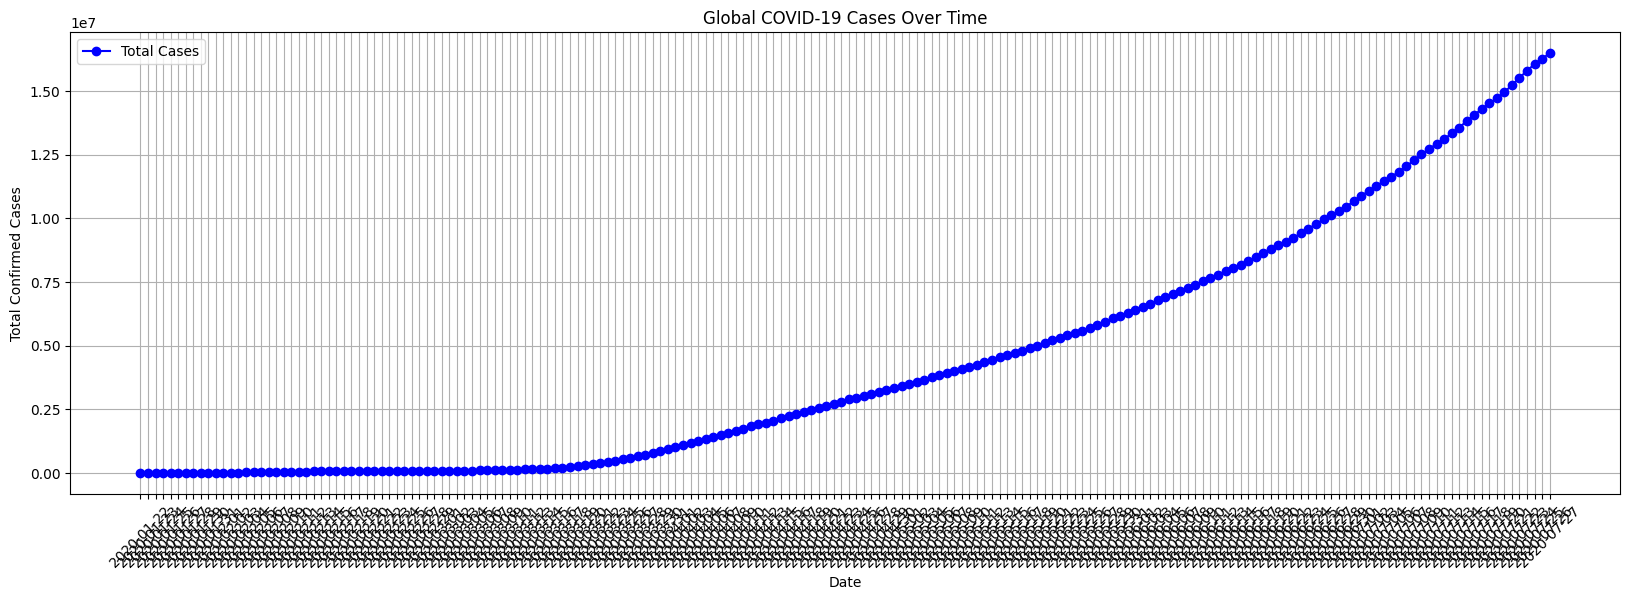

In [ ]:
plt.figure(figsize=(20, 6))  # Set figure size
plt.plot(df_grouped.index, df_grouped.values, marker='o', linestyle='-', color='b', label="Total Cases")

plt.xlabel("Date")  # X-axis label
plt.ylabel("Total Confirmed Cases")  # Y-axis label
plt.title("Global COVID-19 Cases Over Time")  # Title of the graph
plt.xticks(rotation=45)  # Rotate date labels for better visibility
plt.legend()  # Show legend
plt.grid()  # Add grid lines
plt.show()  # Display the plot


In [ ]:
top_countries = df.groupby("Country/Region")["Confirmed"].max().nlargest(5).index


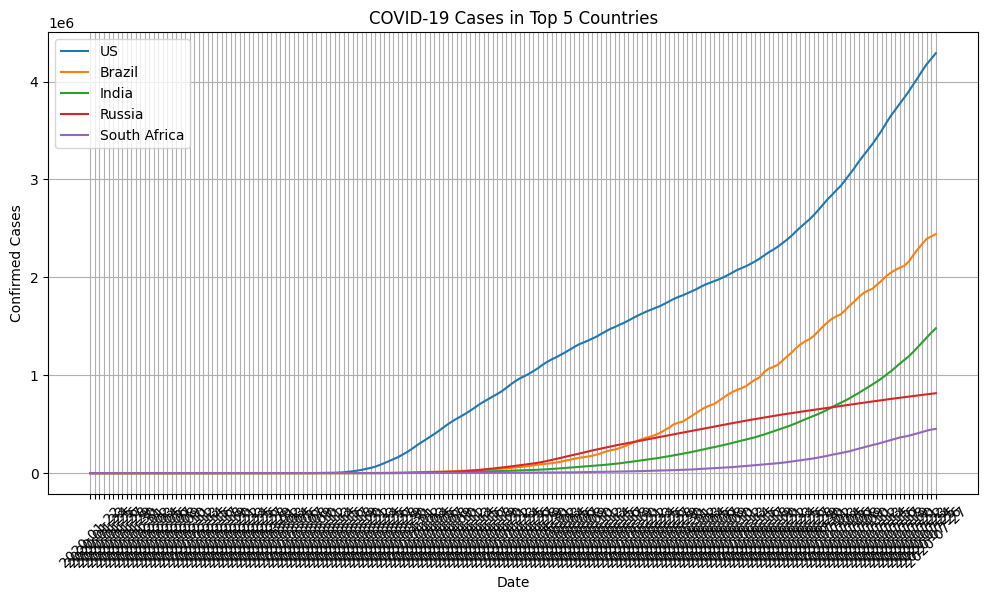

In [ ]:
plt.figure(figsize=(12, 6))

for country in top_countries:
    country_data = df[df["Country/Region"] == country].groupby("Date")["Confirmed"].sum()
    plt.plot(country_data.index, country_data.values, label=country)

plt.xlabel("Date")
plt.ylabel("Confirmed Cases")
plt.title("COVID-19 Cases in Top 5 Countries")
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.show()


In [ ]:
df_grouped_daily = df_grouped.diff().fillna(0)  # Calculate daily difference


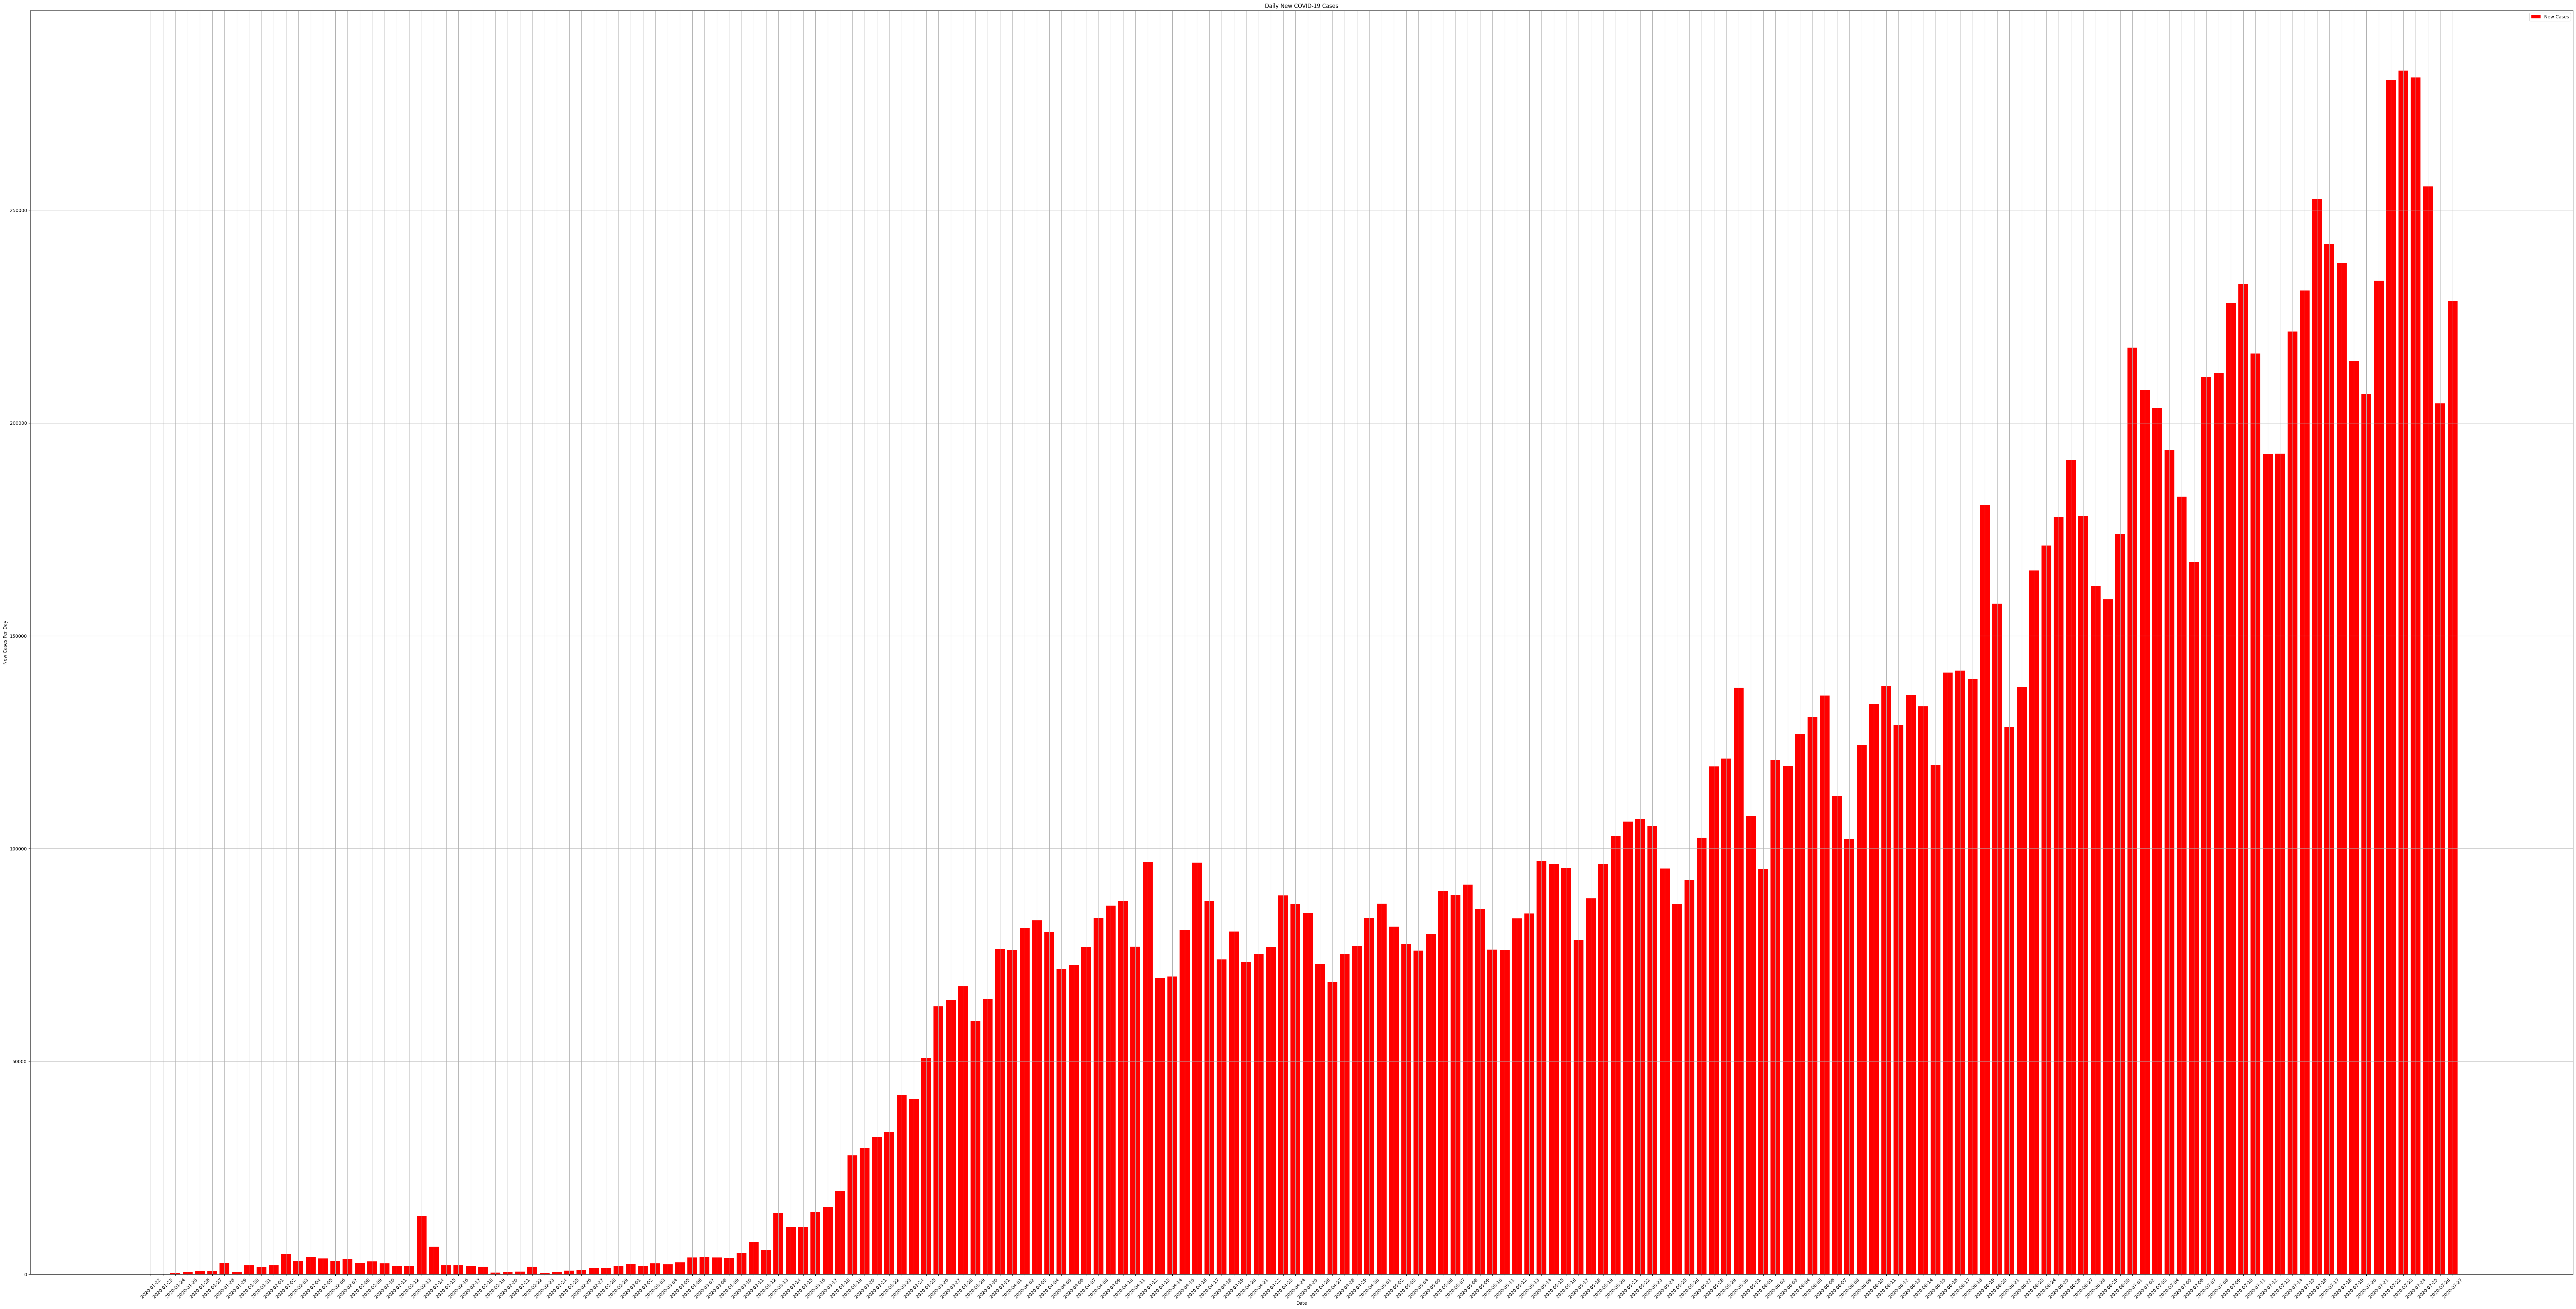

In [ ]:
plt.figure(figsize=(100, 50))
plt.bar(df_grouped_daily.index, df_grouped_daily.values, color='r', label="New Cases")

plt.xlabel("Date")
plt.ylabel("New Cases Per Day")
plt.title("Daily New COVID-19 Cases")
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.show()


In [ ]:
top_10_countries = df.groupby("Country/Region")["Confirmed"].max().nlargest(10).index


In [ ]:
df_top_10 = df[df["Country/Region"].isin(top_10_countries)]
df_pivot = df_top_10.pivot_table(index="Date", columns="Country/Region", values="Confirmed", aggfunc="sum")


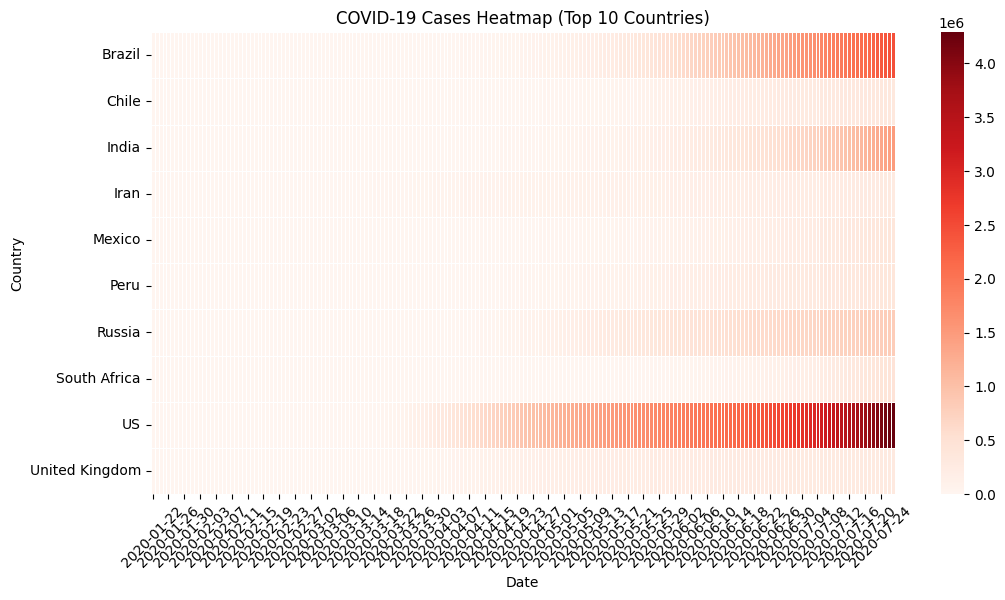

In [ ]:
plt.figure(figsize=(12, 6))
sns.heatmap(df_pivot.T, cmap="Reds", linewidths=0.5)

plt.xlabel("Date")
plt.ylabel("Country")
plt.title("COVID-19 Cases Heatmap (Top 10 Countries)")
plt.xticks(rotation=45)
plt.show()


In [ ]:
df = df[["Date", "Confirmed", "Recovered", "Deaths"]]  # Keep only necessary columns


In [ ]:
df["Date"] = pd.to_datetime(df["Date"])  # Convert to DateTime format
df["Days_Since"] = (df["Date"] - df["Date"].min()).dt.days  # Convert to number of days
df.drop(columns=["Date"], inplace=True)  # Drop original Date column


<ipython-input-26-1f916a9cb9a8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Date"] = pd.to_datetime(df["Date"])  # Convert to DateTime format
<ipython-input-26-1f916a9cb9a8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Days_Since"] = (df["Date"] - df["Date"].min()).dt.days  # Convert to number of days
<ipython-input-26-1f916a9cb9a8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/p

In [ ]:
df["New_Cases"] = df["Confirmed"].diff().fillna(0)  # Difference of cases per day
df["New_Recoveries"] = df["Recovered"].diff().fillna(0)
df["New_Deaths"] = df["Deaths"].diff().fillna(0)
df["Active_Cases"] = df["Confirmed"] - df["Recovered"] - df["Deaths"]  # Total active cases

# Rolling average (7-day window to smooth fluctuations)
df["New_Cases_Avg"] = df["New_Cases"].rolling(window=7).mean().fillna(0)


<ipython-input-27-d078671d60fc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["New_Cases"] = df["Confirmed"].diff().fillna(0)  # Difference of cases per day
<ipython-input-27-d078671d60fc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["New_Recoveries"] = df["Recovered"].diff().fillna(0)
<ipython-input-27-d078671d60fc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()  # Initialize scaler
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)  # Scale data


In [ ]:
print(df_scaled.head())  # Show first 5 rows


   Confirmed  Recovered  Deaths  Days_Since  New_Cases  New_Recoveries  \
0        0.0        0.0     0.0         0.0   0.498831         0.50065   
1        0.0        0.0     0.0         0.0   0.498831         0.50065   
2        0.0        0.0     0.0         0.0   0.498831         0.50065   
3        0.0        0.0     0.0         0.0   0.498831         0.50065   
4        0.0        0.0     0.0         0.0   0.498831         0.50065   

   New_Deaths  Active_Cases  New_Cases_Avg  
0    0.499855      0.000005        0.50001  
1    0.499855      0.000005        0.50001  
2    0.499855      0.000005        0.50001  
3    0.499855      0.000005        0.50001  
4    0.499855      0.000005        0.50001  


In [ ]:
from sklearn.model_selection import train_test_split

X = df_scaled.drop(columns=["Confirmed"])  # All features except the target
y = df_scaled["Confirmed"]  # Target variable (cases to predict)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()  # Initialize the model
model.fit(X_train, y_train)  # Train the model on training data


LinearRegression()

In [ ]:
y_pred = model.predict(X_test)  # Predict using test data


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R² Score:", r2)


Mean Absolute Error: 2.481351582139907e-17
Mean Squared Error: 1.871241203076941e-33
R² Score: 1.0


In [ ]:
# ✅ Step 1: Get the Last Row of Data
last_row = df_scaled.iloc[-1]  # Get last known data

# ✅ Step 2: Generate Future DataFrame with All Features
future_days = 10  # Predict next 10 days

future_data = []
for i in range(1, future_days + 1):
    future_entry = last_row.copy()  # Copy last known data
    future_entry["Days_Since"] += i  # Increase days
    future_data.append(future_entry)

future_df = pd.DataFrame(future_data)  # Convert list to DataFrame
future_df = future_df.drop(columns=["Confirmed"])  # Remove target column

# ✅ Step 3: Predict Future Cases Using the Model
future_predictions = model.predict(future_df)

# ✅ Step 4: Display Predictions
print("Predicted COVID-19 cases for the next 10 days:", future_predictions)




Predicted COVID-19 cases for the next 10 days: [0.00011771 0.00011771 0.00011771 0.00011771 0.00011771 0.00011771
 0.00011771 0.00011771 0.00011771 0.00011771]


In [ ]:
# ✅ Step 7.1: Check Model Performance (Linear Regression)
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Linear Regression Performance:")
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)

# ✅ Step 7.2: Train a Decision Tree Model
from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor(max_depth=5, random_state=42)  # Initialize Decision Tree
dt_model.fit(X_train, y_train)  # Train model
y_pred_dt = dt_model.predict(X_test)  # Make predictions

# ✅ Step 7.3: Train a Random Forest Model
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)  # Initialize Random Forest
rf_model.fit(X_train, y_train)  # Train model
y_pred_rf = rf_model.predict(X_test)  # Make predictions

# ✅ Step 7.4: Compare Model Performance
mae_dt = mean_absolute_error(y_test, y_pred_dt)
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("\nDecision Tree Performance:")
print("MAE:", mae_dt, "| MSE:", mse_dt, "| R²:", r2_dt)

print("\nRandom Forest Performance:")
print("MAE:", mae_rf, "| MSE:", mse_rf, "| R²:", r2_rf)

# ✅ Step 7.5: Select the Best Model for Future Predictions
best_model = rf_model if r2_rf > r2_dt else dt_model  # Choose model with better R² score
print("\nBest Model Selected:", "Random Forest" if best_model == rf_model else "Decision Tree")

# ✅ Step 7.6: Predict Future Cases Using the Best Model
future_days = 10  # Predict next 10 days

future_data = []
last_row = df_scaled.iloc[-1]  # Get last known data

for i in range(1, future_days + 1):
    future_entry = last_row.copy()  # Copy last known data
    future_entry["Days_Since"] += i  # Increase days
    future_data.append(future_entry)

future_df = pd.DataFrame(future_data)  # Convert list to DataFrame
future_df = future_df.drop(columns=["Confirmed"])  # Remove target column

future_predictions = best_model.predict(future_df)  # Predict future cases

print("\nPredicted COVID-19 cases for the next 10 days:", future_predictions)



Linear Regression Performance:
Mean Absolute Error (MAE): 2.481351582139907e-17
Mean Squared Error (MSE): 1.871241203076941e-33
R² Score: 1.0

Decision Tree Performance:
MAE: 0.0005060003960939558 | MSE: 2.989317364498877e-06 | R²: 0.9971082276143016

Random Forest Performance:
MAE: 2.7302339525711583e-05 | MSE: 5.8310430797586375e-08 | R²: 0.999943592307869

Best Model Selected: Random Forest

Predicted COVID-19 cases for the next 10 days: [0.00011767 0.00011767 0.00011767 0.00011767 0.00011767 0.00011767
 0.00011767 0.00011767 0.00011767 0.00011767]


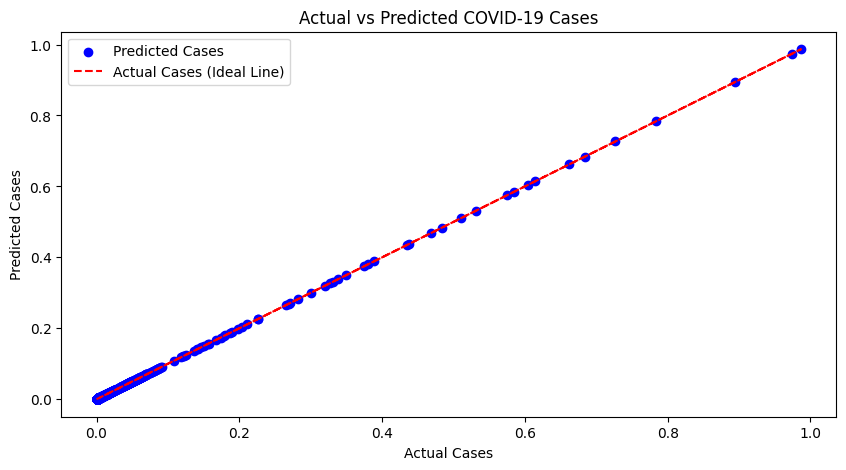

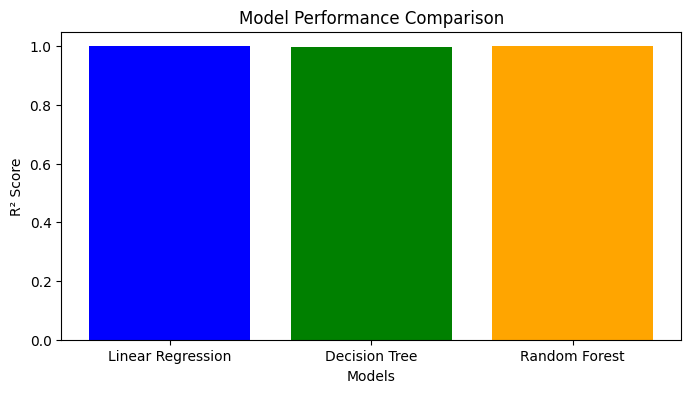

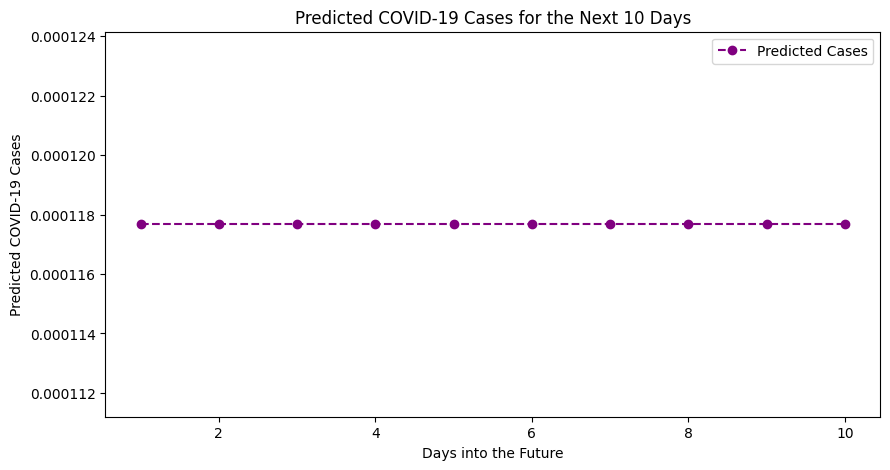

In [ ]:
import matplotlib.pyplot as plt

# ✅ Step 8.1: Plot Actual vs Predicted Cases (Test Data)
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, color="blue", label="Predicted Cases")
plt.plot(y_test, y_test, color="red", linestyle="dashed", label="Actual Cases (Ideal Line)")
plt.xlabel("Actual Cases")
plt.ylabel("Predicted Cases")
plt.title("Actual vs Predicted COVID-19 Cases")
plt.legend()
plt.show()

# ✅ Step 8.2: Plot Model Performance for All Models
models = ["Linear Regression", "Decision Tree", "Random Forest"]
r2_scores = [r2, r2_dt, r2_rf]

plt.figure(figsize=(8, 4))
plt.bar(models, r2_scores, color=["blue", "green", "orange"])
plt.xlabel("Models")
plt.ylabel("R² Score")
plt.title("Model Performance Comparison")
plt.show()

# ✅ Step 8.3: Plot Future Predictions
future_dates = range(1, future_days + 1)

plt.figure(figsize=(10, 5))
plt.plot(future_dates, future_predictions, marker="o", linestyle="dashed", color="purple", label="Predicted Cases")
plt.xlabel("Days into the Future")
plt.ylabel("Predicted COVID-19 Cases")
plt.title("Predicted COVID-19 Cases for the Next 10 Days")
plt.legend()
plt.show()


In [4]:
import pickle # Import the pickle module
from sklearn.ensemble import RandomForestRegressor # Assuming RandomForest is the best model

# If RandomForest was indeed the best model:
best_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Or if DecisionTree was the best model, uncomment below and comment above:
# from sklearn.tree import DecisionTreeRegressor
# best_model = DecisionTreeRegressor(max_depth=5, random_state=42)

# Fit the best model again if you haven't already in this session
best_model.fit(X_train, y_train)

# Now save it
with open('model.pkl', 'wb') as file:
    pickle.dump(best_model, file)  # Assuming 'best_model' is the variable to save

NameError: name 'X_train' is not defined